In [19]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
plt.rcParams["axes.labelsize"] = 15
import seaborn as sns
import warnings

In [20]:
nyc_df=pd.read_csv('nyc_df.csv')

In [21]:
nyc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48755 entries, 0 to 48754
Data columns (total 34 columns):
id                              48755 non-null int64
street                          48755 non-null object
neighbourhood                   48743 non-null object
neighbourhood_cleansed          48755 non-null object
neighbourhood_group_cleansed    48755 non-null object
city                            48693 non-null object
state                           48749 non-null object
zipcode                         48755 non-null float64
market                          48755 non-null object
smart_location                  48755 non-null object
latitude                        48755 non-null float64
longitude                       48755 non-null float64
is_location_exact               48755 non-null object
property_type                   48755 non-null object
room_type                       48755 non-null object
accommodates                    48755 non-null int64
bathrooms                 

In [22]:
nyc_df.isnull().sum()

id                                  0
street                              0
neighbourhood                      12
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
city                               62
state                               6
zipcode                             0
market                              0
smart_location                      0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bathrooms                           1
bedrooms                            5
beds                                5
bed_type                            0
square_feet                     48347
price                               0
monthly_price                   43509
security_deposit                17270
number_of_reviews                   0
first_review                    10024
last_review 

## Exploratory Data Analysis

### Top neighbourhoods based on number of listings

No handles with labels found to put in legend.


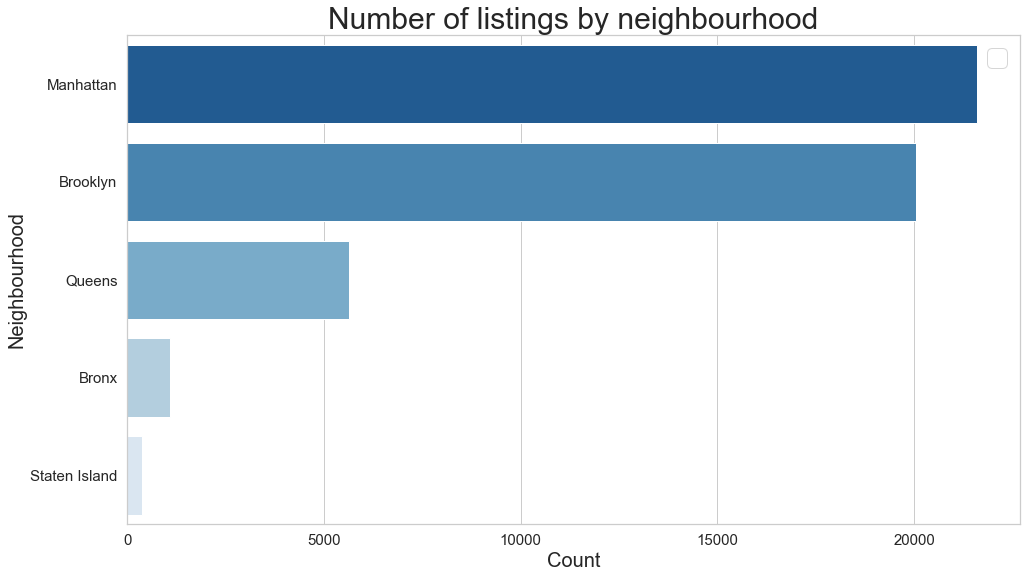

In [23]:
sns.set(style="whitegrid")
df=nyc_df.neighbourhood_group_cleansed.value_counts(ascending=False).to_frame().reset_index()
ax = sns.barplot(x="neighbourhood_group_cleansed", y="index",palette='Blues_r', data=df)

plt.xlabel('Count', fontsize=20)
plt.ylabel('Neighbourhood', fontsize=20)

ax.axes.set_title("Number of listings by neighbourhood",fontsize=30)
ax.legend(fontsize=25)
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### Top suburbs based on number of listings 

No handles with labels found to put in legend.


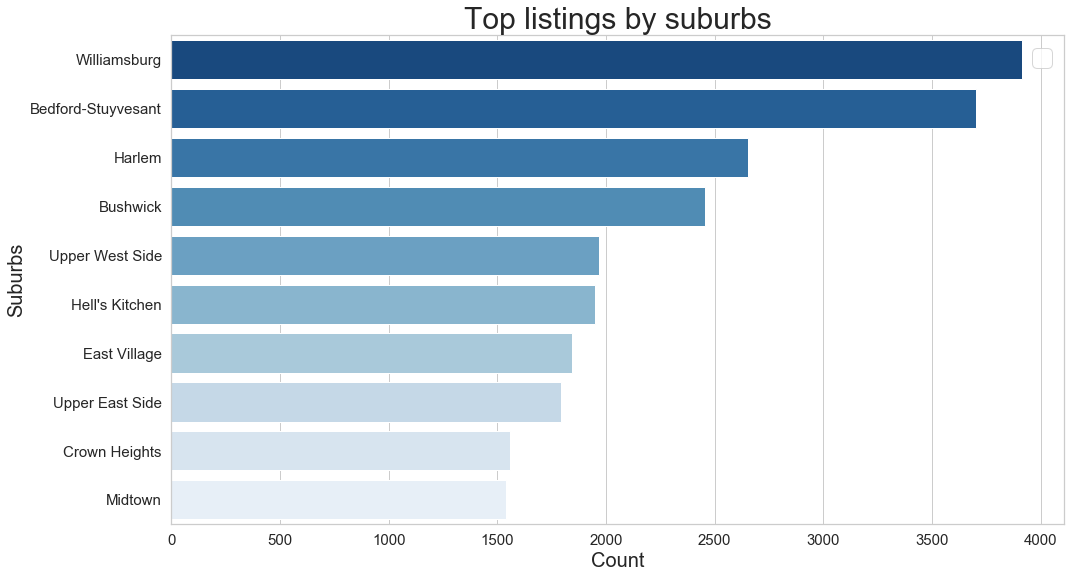

In [24]:
df=nyc_df.neighbourhood_cleansed.value_counts(ascending=False)[:10].to_frame().reset_index()
ax = sns.barplot(x="neighbourhood_cleansed", y="index",palette='Blues_r', data=df)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Suburbs', fontsize=20)

ax.axes.set_title("Top listings by suburbs",fontsize=30)
ax.legend(fontsize=25)
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### Variation in price

In [25]:
nyc_df['price']=nyc_df['price'].replace('[\$,]', '', regex=True).astype(float)

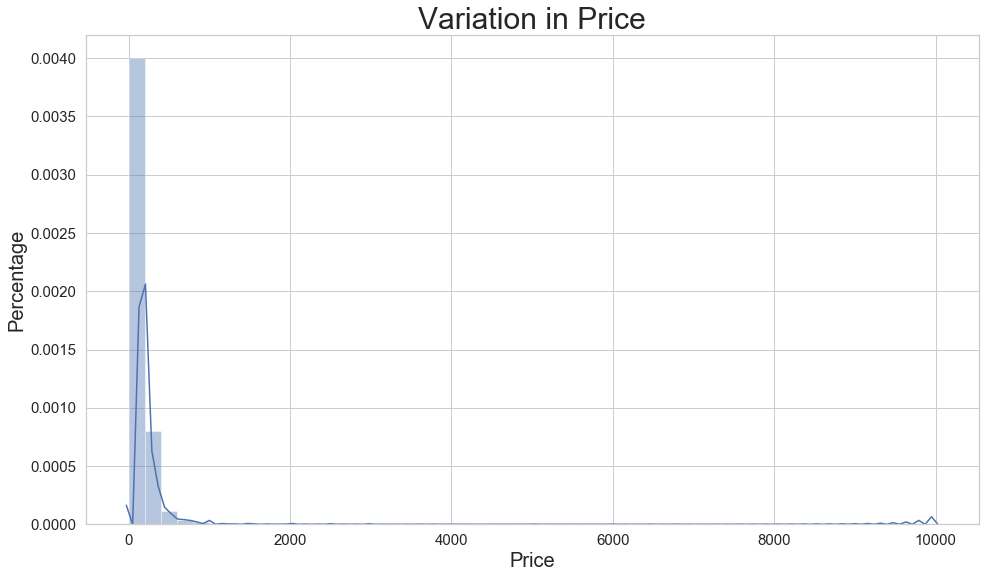

In [26]:
ax = sns.distplot(nyc_df['price'])
ax.axes.set_title("Variation in Price",fontsize=30)

plt.xlabel('Price', fontsize=20)
plt.ylabel('Percentage', fontsize=20)


for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)
    

In [27]:
#boxplot
nyc_df.groupby('neighbourhood_group_cleansed')['price'].mean()

neighbourhood_group_cleansed
Bronx             87.496792
Brooklyn         124.426954
Manhattan        196.997963
Queens            99.656383
Staten Island    114.812332
Name: price, dtype: float64

### Average price by neighbourhood

No handles with labels found to put in legend.


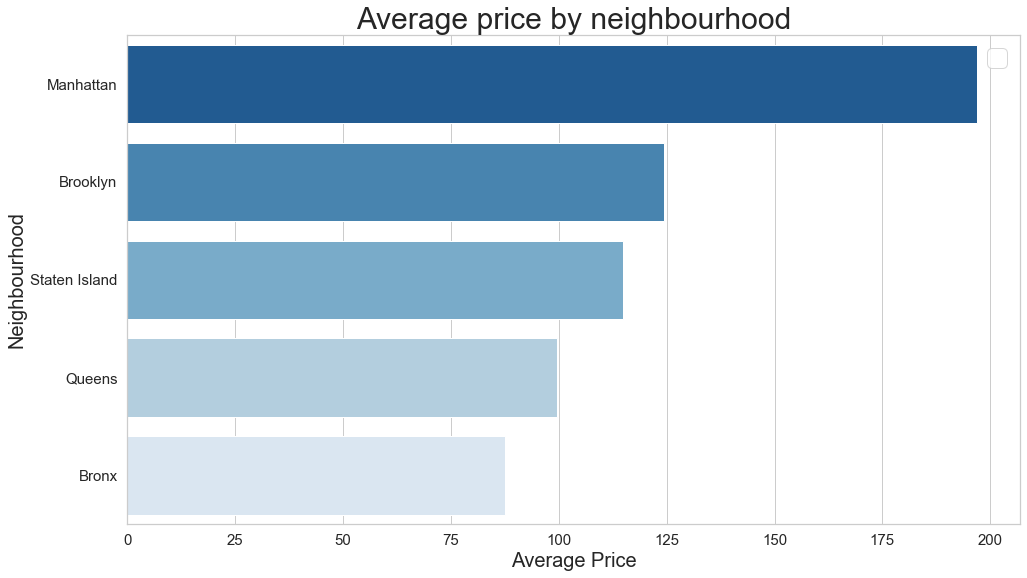

In [28]:
sns.set(style="whitegrid")
df=nyc_df.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending=False).to_frame().reset_index()
df

ax = sns.barplot(x="price", y="neighbourhood_group_cleansed",palette='Blues_r', data=df)
ax.axes.set_title("Average price by neighbourhood",fontsize=30)
plt.xlabel('Average Price', fontsize=20)
plt.ylabel('Neighbourhood', fontsize=20)

ax.legend(fontsize=25)
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

### Average price by room_type

/Users/maverick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


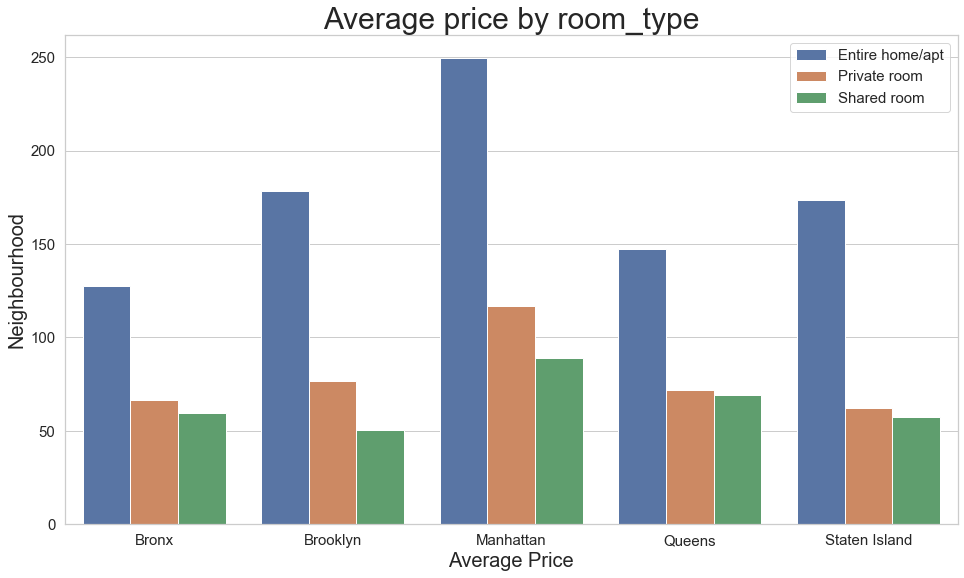

In [29]:
df=nyc_df.groupby(['neighbourhood_group_cleansed','room_type']).price.agg({'mean_price':'mean'}).reset_index()

ax=sns.barplot(x="neighbourhood_group_cleansed", y="mean_price", hue="room_type", data=df)
ax.axes.set_title("Average price by room_type",fontsize=30)
plt.xlabel('Average Price', fontsize=20)
plt.ylabel('Neighbourhood', fontsize=20)

ax.legend(fontsize=15)
for tick in ax.axes.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.axes.yaxis.get_major_ticks():
    tick.label.set_fontsize(15)

/Users/maverick/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


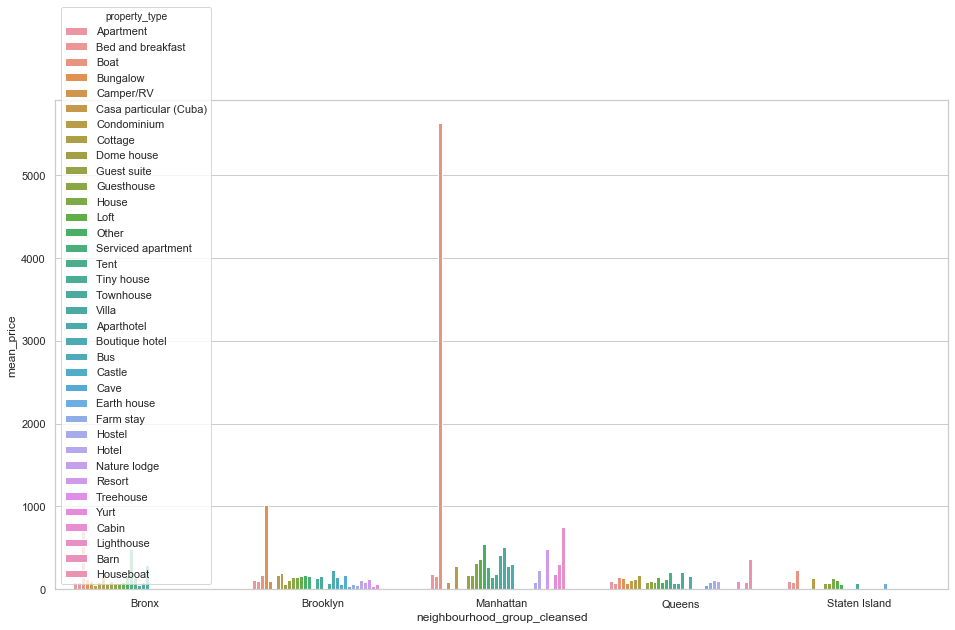

In [30]:
df=nyc_df.groupby(['neighbourhood_group_cleansed','property_type']).price.agg({'mean_price':'mean'}).reset_index()

sns.barplot(x="neighbourhood_group_cleansed", y="mean_price", hue="property_type", data=df)


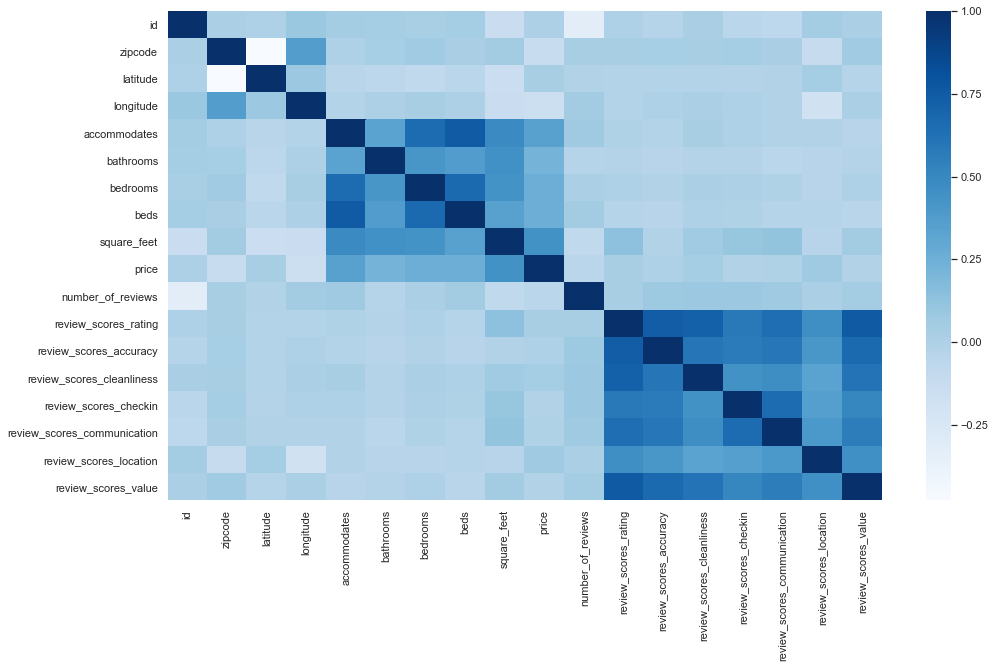

In [31]:
corrMatrix = nyc_df.corr()
ax = sns.heatmap(corrMatrix, cmap="Blues")

In [32]:
corrMatrix['price'].reset_index()

,index,price
0,id,0.010400
1,zipcode,-0.119029
2,latitude,0.033907
3,longitude,-0.149882
4,accommodates,0.344450
5,bathrooms,0.225968
6,bedrooms,0.257895
7,beds,0.258373
8,square_feet,0.444533
9,price,1.000000


No handles with labels found to put in legend.


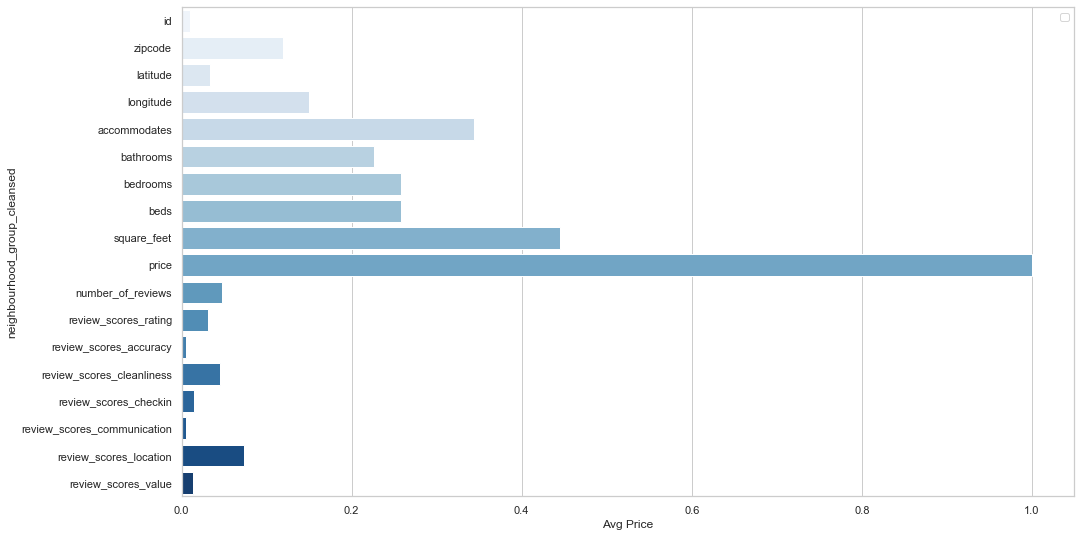

In [33]:
df=abs(corrMatrix['price']).reset_index()
ax = sns.barplot(x="price", y="index",palette='Blues', data=df)
ax.set(xlabel='Avg Price', ylabel='neighbourhood_group_cleansed')
ax.legend()

In [34]:
nyc_df.zipcode.sort_values(ascending=False)

48518    94085.0
23586    91766.0
40535    11694.0
33558    11694.0
42043    11694.0
48611    11694.0
34610    11694.0
15166    11694.0
5989     11694.0
9976     11694.0
40460    11694.0
48282    11694.0
34289    11694.0
23743    11694.0
32360    11694.0
31772    11694.0
22813    11693.0
24416    11693.0
48563    11693.0
33723    11693.0
36810    11693.0
24387    11693.0
48136    11693.0
31202    11693.0
48097    11693.0
48088    11693.0
42322    11693.0
48083    11693.0
48621    11693.0
367      11693.0
          ...   
2738     10001.0
45491    10001.0
2740     10001.0
18580    10001.0
31045    10001.0
22198    10001.0
4435     10001.0
23569    10001.0
29261    10001.0
26254    10001.0
29342    10001.0
12004    10001.0
5062     10001.0
44741    10001.0
48422    10001.0
16231    10001.0
16230    10001.0
16229    10001.0
16228    10001.0
40567    10001.0
12480    10001.0
48589    10001.0
996      10001.0
44221    10001.0
22233    10001.0
520      10001.0
46181    10001.0
43792    10001